Dataset shape: (150, 4)
Number of classes: 3
Class distribution:
 species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

Feature names: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

Target classes: ['setosa' 'versicolor' 'virginica']

First 5 rows of the dataset:
   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

Descriptive statistics:
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min     

<Figure size 1200x800 with 0 Axes>

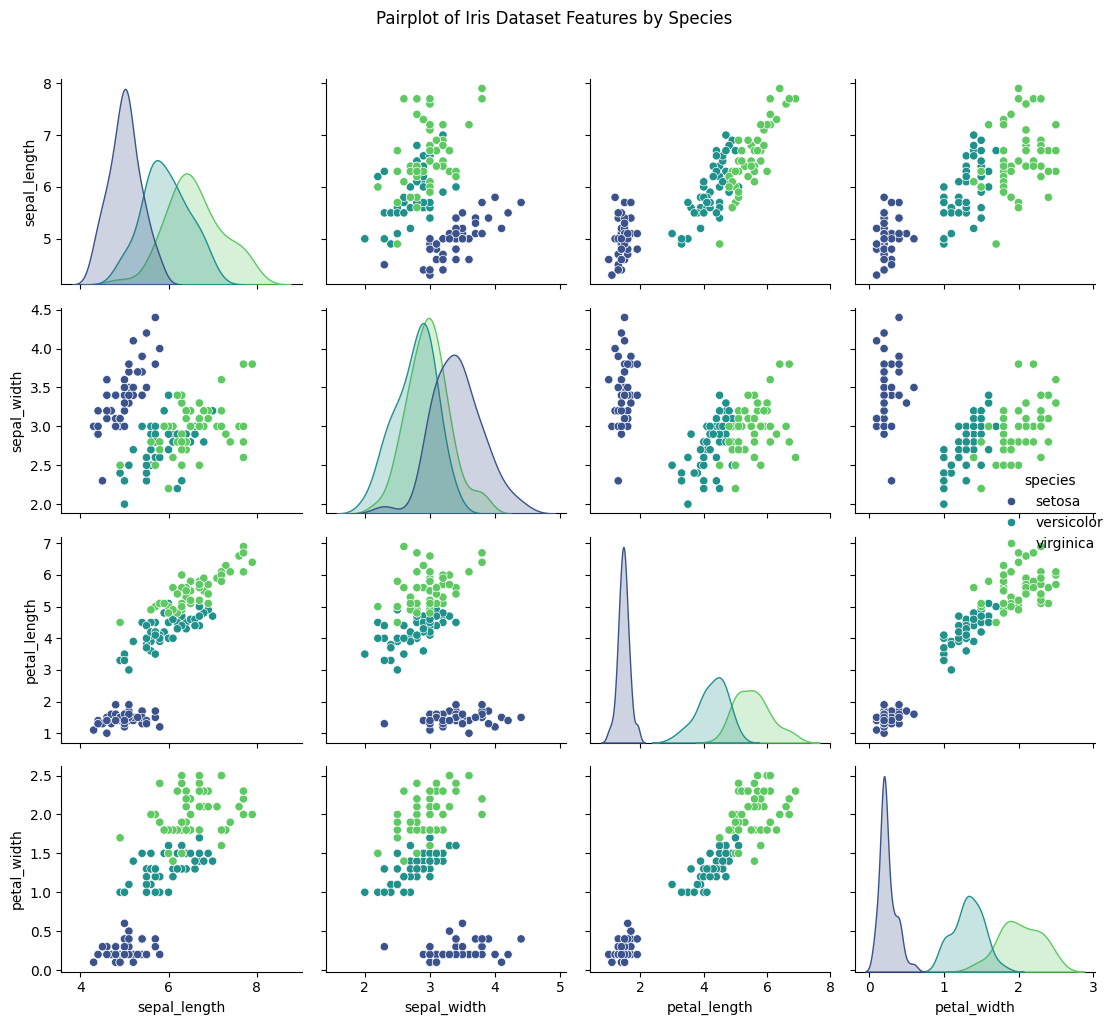

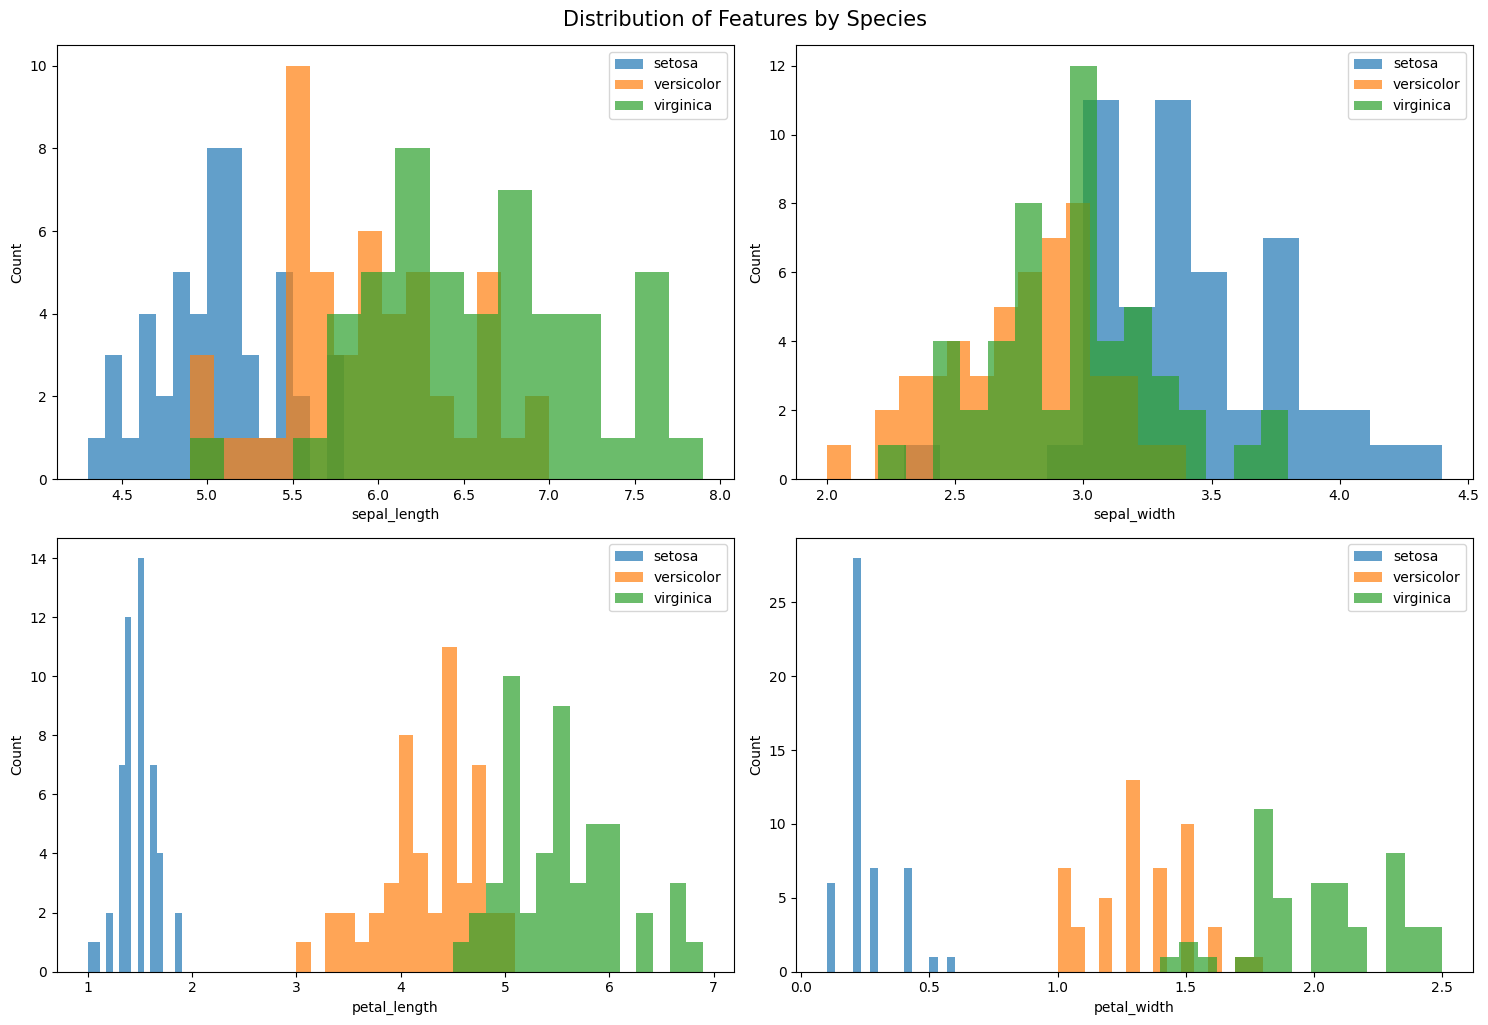

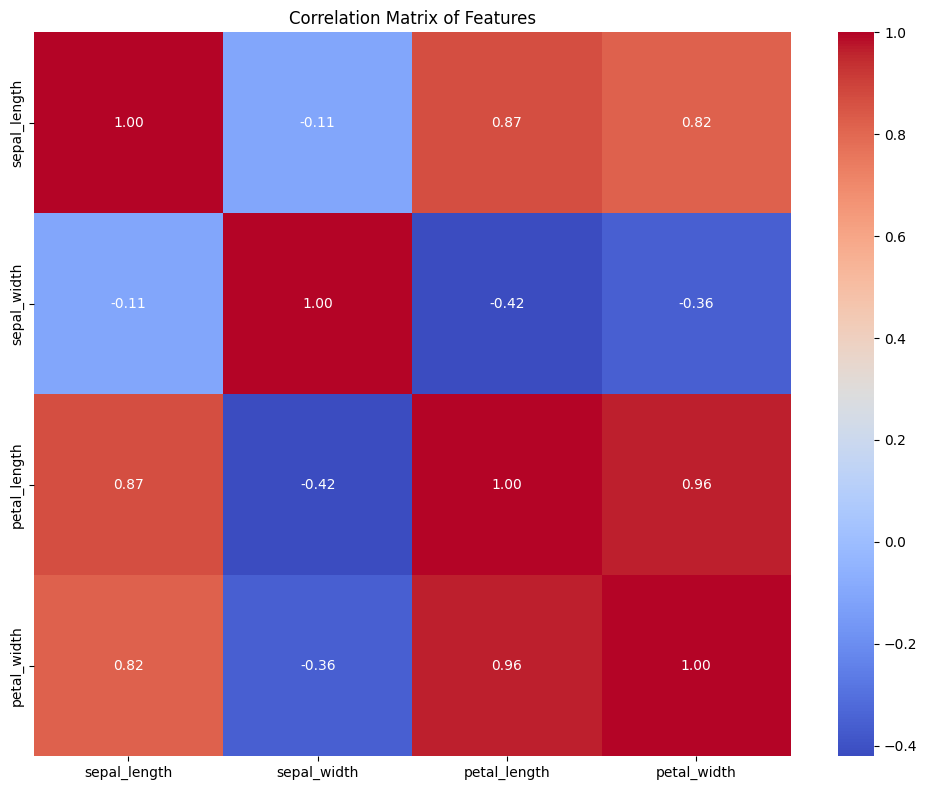

<ipython-input-6-ecdbcff231ec>:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=y, y=feature, data=pd.concat([X, y], axis=1), palette='viridis')
<ipython-input-6-ecdbcff231ec>:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=y, y=feature, data=pd.concat([X, y], axis=1), palette='viridis')
<ipython-input-6-ecdbcff231ec>:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=y, y=feature, data=pd.concat([X, y], axis=1), palette='viridis')
<ipython-input-6-ecdbcff231ec>:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprec

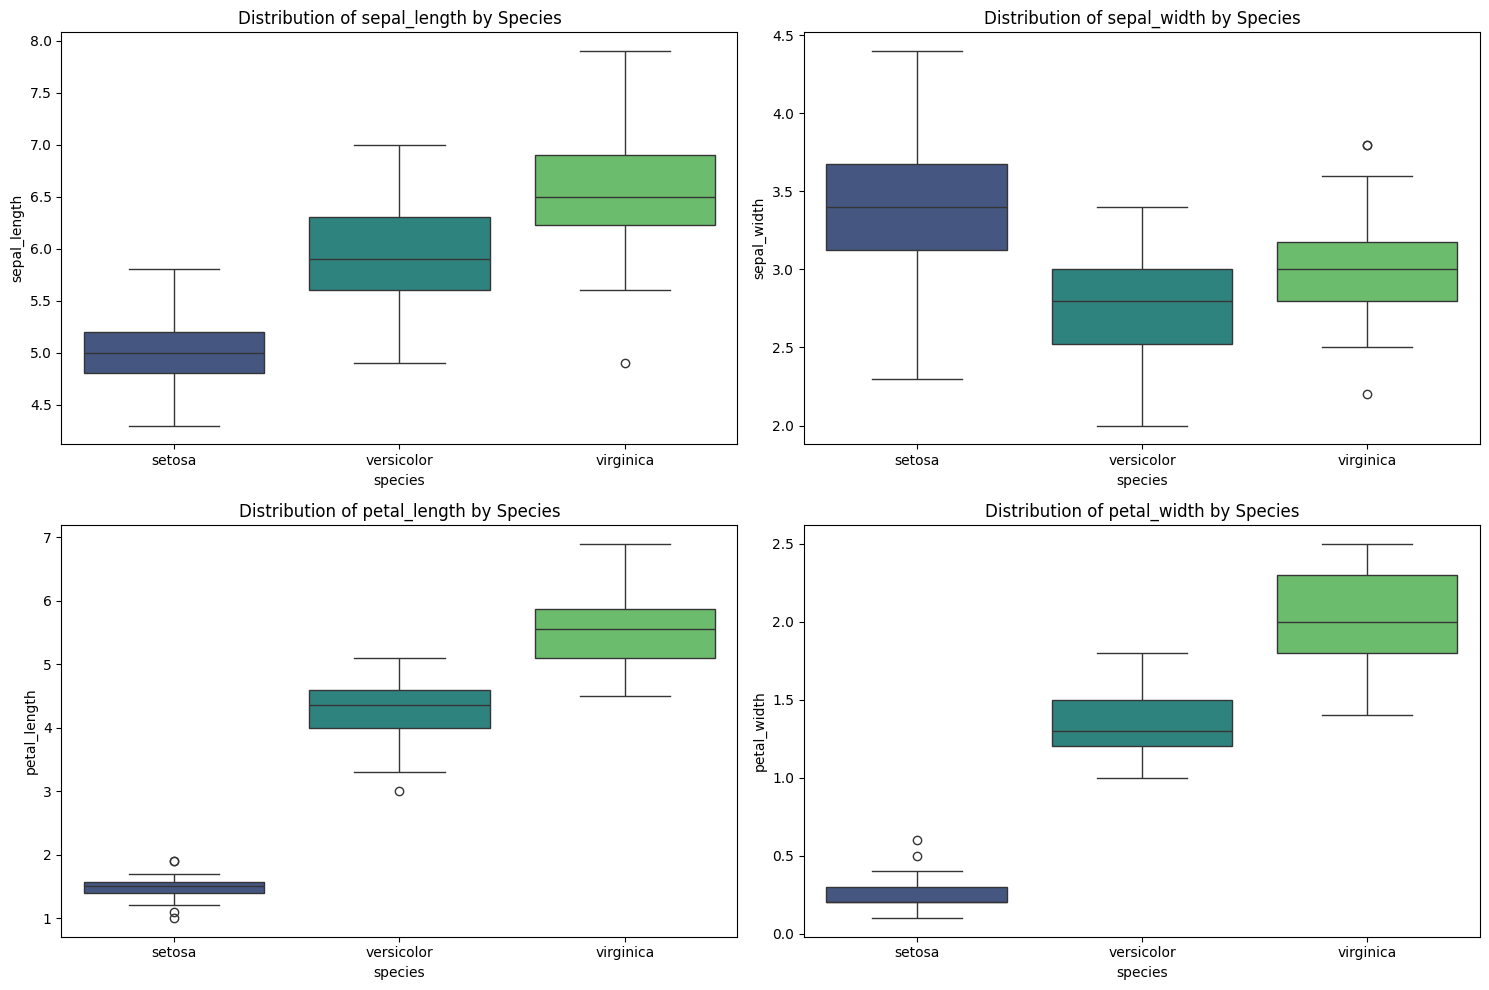


Feature importance using ANOVA F-value:
        Feature        Score
2  petal_length  1179.034328
3   petal_width   959.324406
0  sepal_length   119.264502
1   sepal_width    47.364461


<ipython-input-6-ecdbcff231ec>:86: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Feature', y='Score', data=feature_scores, palette='viridis')


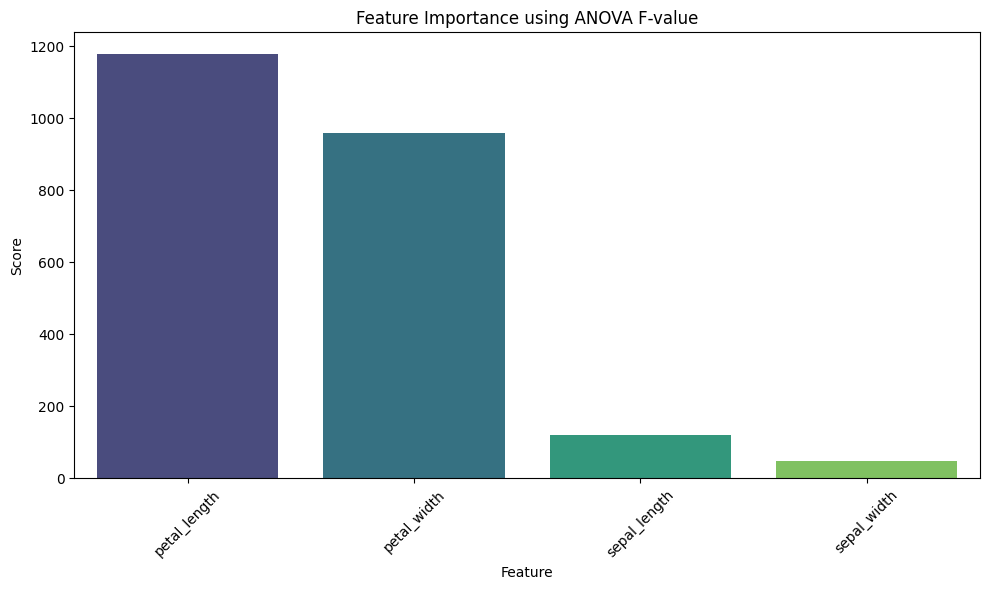

<ipython-input-6-ecdbcff231ec>:101: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=y, y='petal_ratio', data=pd.concat([X, y], axis=1), palette='viridis')


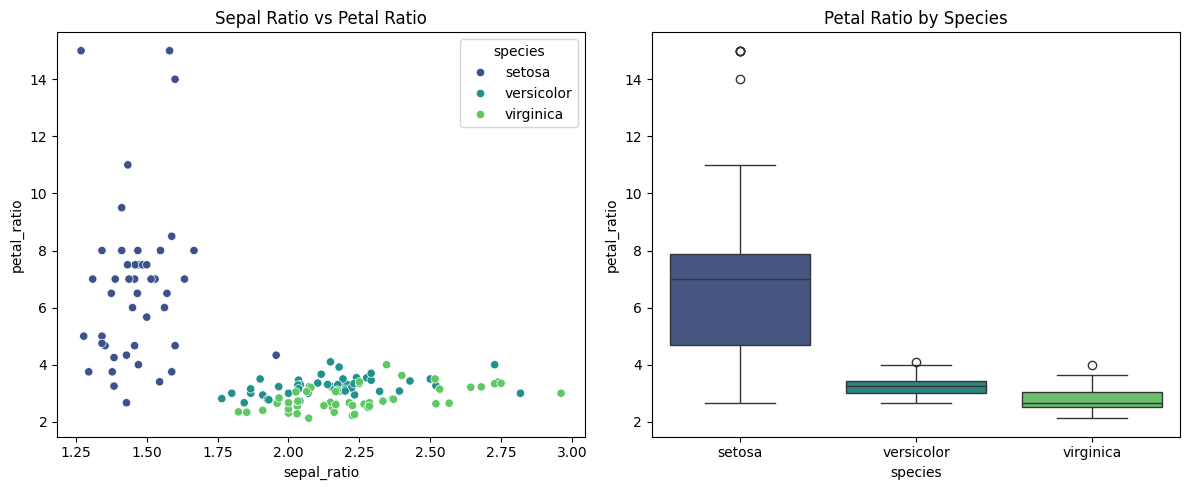


Training set shape: (112, 6)
Testing set shape: (38, 6)

Logistic Regression:
Cross-validation accuracy: 0.9458 ± 0.0531
Test accuracy: 0.8947
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      0.92      0.96        12
  versicolor       0.80      0.92      0.86        13
   virginica       0.92      0.85      0.88        13

    accuracy                           0.89        38
   macro avg       0.91      0.90      0.90        38
weighted avg       0.90      0.89      0.90        38


K-Nearest Neighbors:
Cross-validation accuracy: 0.9368 ± 0.0465
Test accuracy: 0.8947
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.76      1.00      0.87        13
   virginica       1.00      0.69      0.82        13

    accuracy                           0.89        38
   macro avg       0.92      0.90      0.89        38
weighted avg    

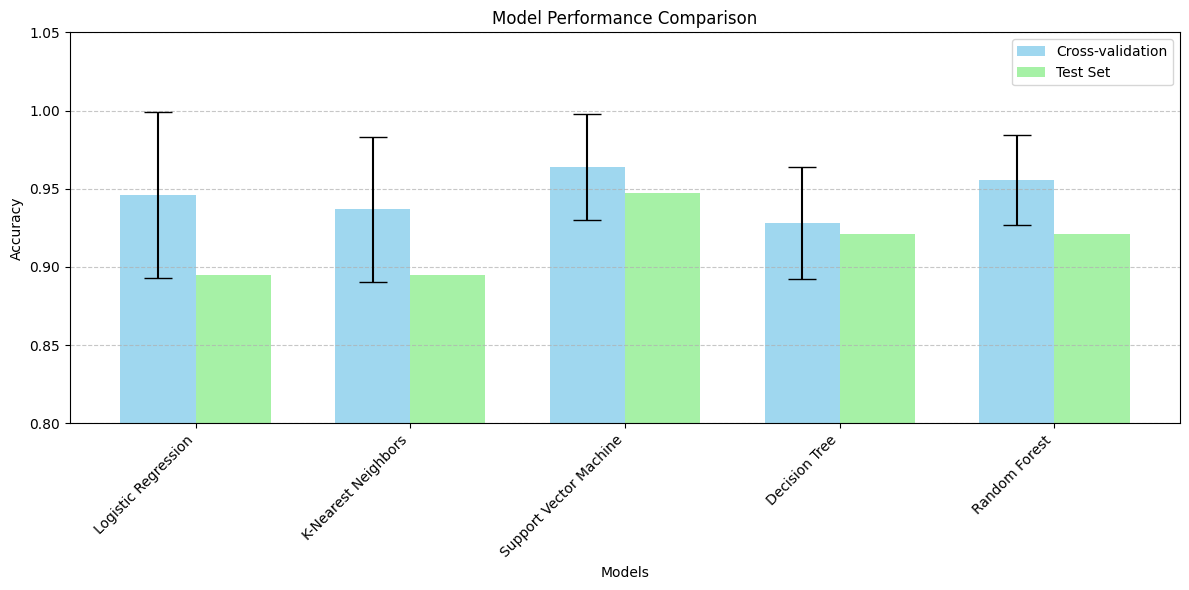


Best parameters found: {'C': 0.1, 'gamma': 0.01, 'kernel': 'linear'}
Tuned model test accuracy: 0.9211
Classification Report for tuned model:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.86      0.92      0.89        13
   virginica       0.92      0.85      0.88        13

    accuracy                           0.92        38
   macro avg       0.92      0.92      0.92        38
weighted avg       0.92      0.92      0.92        38



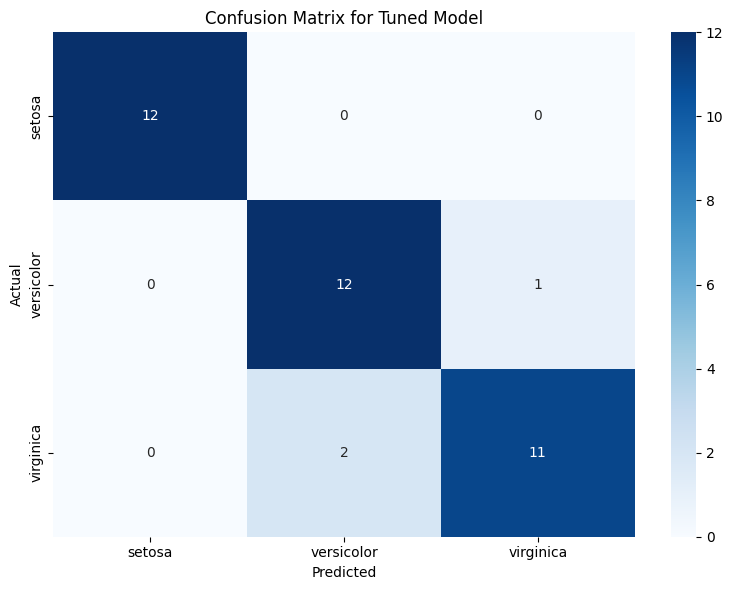


=== Project Summary ===
Best Model: Support Vector Machine
Best Parameters: {'C': 0.1, 'gamma': 0.01, 'kernel': 'linear'}
Test Accuracy: 0.9211

Most Important Features (based on ANOVA F-test):
  petal_length: 1179.03
  petal_width: 959.32

Model successfully classifies Iris flowers into three species.
The model is ready for deployment in a production environment.


In [6]:
# Iris Flower Classification (using IRIS.csv)
# By: Varsha S

# 1. Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif

# Set random seed for reproducibility
np.random.seed(42)

# 2. Load and explore the Iris dataset from CSV
iris_df = pd.read_csv('/content/IRIS.csv')
X = iris_df.drop('species', axis=1)
y = iris_df['species'].str.replace('Iris-', '')  # Clean species names

print("Dataset shape:", X.shape)
print("Number of classes:", y.nunique())
print("Class distribution:\n", y.value_counts())
print("\nFeature names:", list(X.columns))
print("\nTarget classes:", y.unique())

# 3. Exploratory Data Analysis (EDA)
print("\nFirst 5 rows of the dataset:")
print(iris_df.head())

print("\nDescriptive statistics:")
print(X.describe())

print("\nMissing values in the dataset:")
print(X.isnull().sum())

plt.figure(figsize=(12, 8))
sns.pairplot(pd.concat([X, y], axis=1), hue='species', palette='viridis')
plt.suptitle('Pairplot of Iris Dataset Features by Species', y=1.02)
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 10))
for i, feature in enumerate(X.columns):
    plt.subplot(2, 2, i+1)
    for species in y.unique():
        plt.hist(X[y == species][feature], bins=15, alpha=0.7, label=species)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend()
plt.tight_layout()
plt.suptitle('Distribution of Features by Species', y=1.02, fontsize=15)
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Features')
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 10))
for i, feature in enumerate(X.columns):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x=y, y=feature, data=pd.concat([X, y], axis=1), palette='viridis')
    plt.title(f'Distribution of {feature} by Species')
plt.tight_layout()
plt.show()

# 4. Feature Selection and Engineering
selector = SelectKBest(f_classif, k=2)
X_new = selector.fit_transform(X, y)
feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': selector.scores_})
feature_scores = feature_scores.sort_values(by='Score', ascending=False)

print("\nFeature importance using ANOVA F-value:")
print(feature_scores)

plt.figure(figsize=(10, 6))
sns.barplot(x='Feature', y='Score', data=feature_scores, palette='viridis')
plt.title('Feature Importance using ANOVA F-value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

X['sepal_ratio'] = X['sepal_length'] / X['sepal_width']
X['petal_ratio'] = X['petal_length'] / X['petal_width']

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x='sepal_ratio', y='petal_ratio', hue=y, data=pd.concat([X, y], axis=1), palette='viridis')
plt.title('Sepal Ratio vs Petal Ratio')

plt.subplot(1, 2, 2)
sns.boxplot(x=y, y='petal_ratio', data=pd.concat([X, y], axis=1), palette='viridis')
plt.title('Petal Ratio by Species')

plt.tight_layout()
plt.show()

# 5. Data Preprocessing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

print("\nTraining set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

# 6. Model Selection and Training
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC(random_state=42, probability=True),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42)
}

model_scores = {}

for name, model in models.items():
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    model_scores[name] = {'model': model, 'accuracy': accuracy, 'cv_mean': np.mean(cv_scores), 'cv_std': np.std(cv_scores)}
    print(f"\n{name}:")
    print(f"Cross-validation accuracy: {np.mean(cv_scores):.4f} ± {np.std(cv_scores):.4f}")
    print(f"Test accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

best_model_name = max(model_scores, key=lambda x: model_scores[x]['accuracy'])
best_model = model_scores[best_model_name]['model']
print(f"\nBest model: {best_model_name} with accuracy {model_scores[best_model_name]['accuracy']:.4f}")

plt.figure(figsize=(12, 6))
model_names = list(model_scores.keys())
accuracies = [model_scores[name]['accuracy'] for name in model_names]
cv_means = [model_scores[name]['cv_mean'] for name in model_names]
cv_stds = [model_scores[name]['cv_std'] for name in model_names]

x = np.arange(len(model_names))
width = 0.35

plt.bar(x - width/2, cv_means, width, label='Cross-validation', yerr=cv_stds, capsize=10, color='skyblue', alpha=0.8)
plt.bar(x + width/2, accuracies, width, label='Test Set', color='lightgreen', alpha=0.8)

plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Performance Comparison')
plt.xticks(x, model_names, rotation=45, ha='right')
plt.ylim(0.8, 1.05)
plt.legend()
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 7. Hyperparameter Tuning
if isinstance(best_model, SVC):
    param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [0.01, 0.1, 1, 'scale', 'auto'], 'kernel': ['rbf', 'linear', 'poly']}
elif isinstance(best_model, RandomForestClassifier):
    param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
elif isinstance(best_model, KNeighborsClassifier):
    param_grid = {'n_neighbors': [3, 5, 7, 9, 11], 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan']}
elif isinstance(best_model, LogisticRegression):
    param_grid = {'C': [0.01, 0.1, 1, 10, 100], 'solver': ['liblinear', 'lbfgs', 'newton-cg'], 'penalty': ['l1', 'l2']}
else:
    param_grid = {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'criterion': ['gini', 'entropy']}

grid_search = GridSearchCV(best_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)
best_model_tuned = grid_search.best_estimator_

print("\nBest parameters found:", grid_search.best_params_)

# 8. Model Evaluation
y_pred_tuned = best_model_tuned.predict(X_test_scaled)
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
print(f"Tuned model test accuracy: {accuracy_tuned:.4f}")
print("Classification Report for tuned model:")
print(classification_report(y_test, y_pred_tuned))

plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred_tuned)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=y.unique(), yticklabels=y.unique())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Tuned Model')
plt.tight_layout()
plt.show()

# 9. Conclusion
print("\n=== Project Summary ===")
print(f"Best Model: {best_model_name}")
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Test Accuracy: {accuracy_tuned:.4f}")
print("\nMost Important Features (based on ANOVA F-test):")
for _, row in feature_scores.head(2).iterrows():
    print(f"  {row['Feature']}: {row['Score']:.2f}")
print("\nModel successfully classifies Iris flowers into three species.")
print("The model is ready for deployment in a production environment.")
